In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Bootstrap and Confidence Intervals

In [2]:
sf = Table.read_table('http://inferentialthinking.com/notebooks/san_francisco_2015.csv').select(3, 11, 21)
sf.set_format('Total Compensation', NumberFormatter(0))
sf = sf.where('Total Compensation', are.above(10000))

In [3]:
sample_from_population = sf.sample(200, with_replacement=True)

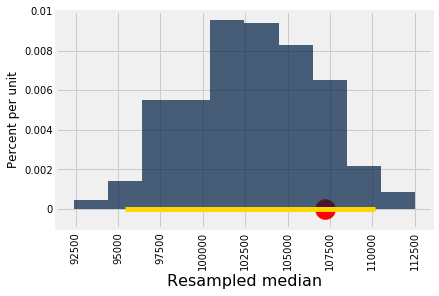

In [ ]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column('Total Compensation'))
    resampled_medians = np.append(resampled_medians, median)
    
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist('Resampled median')
plots.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column('Total Compensation'))
plots.scatter(pop_median, 0, color='red', s=400)

## Confidence: How Often is the Interval Good?

In [ ]:
intervals = Table(['Lower', 'Upper'])

for j in np.arange(100):
    sample_from_population = sf.sample(200)
    resampled_medians = make_array()
    for i in np.arange(1000):
        resample = sample_from_population.sample()
        median = np.median(resample.column('Total Compensation'))
        resampled_medians = np.append(resampled_medians, median)

    interval_95 = [percentile(2.5, resampled_medians),
                   percentile(97.5, resampled_medians)]

    intervals.append(interval_95)
    print('trial number', j, 'of 100')

trial number 0 of 100
trial number 1 of 100
trial number 2 of 100
trial number 3 of 100
trial number 4 of 100
trial number 5 of 100
trial number 6 of 100
trial number 7 of 100
trial number 8 of 100
trial number 9 of 100
trial number 10 of 100
trial number 11 of 100
trial number 12 of 100
trial number 13 of 100
trial number 14 of 100
trial number 15 of 100
trial number 16 of 100


In [ ]:
truth = np.median(sf.column('Total Compensation'))
correct = intervals.where('Lower', are.not_above(truth)).where('Upper', are.not_below(truth))
correct.num_rows

## More Examples

In [ ]:
births = Table.read_table('http://inferentialthinking.com/notebooks/baby.csv')

In [ ]:
babies = births.select('Birth Weight', 'Gestational Days')
babies

In [ ]:
ratios = babies.with_column(
    'Ratio BW/GD', babies.column(0)/babies.column(1)
)
ratios

In [ ]:
ratios.hist('Ratio BW/GD')

In [ ]:
np.median(ratios.column('Ratio BW/GD'))

In [ ]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = ratios.sample()
    median = np.median(resample.column('Ratio BW/GD'))
    resampled_medians = np.append(resampled_medians, median)
    
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist('Resampled median')
plots.plot(interval_95, [0, 0], color='gold', lw=5)

In [ ]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = births.sample()
    median = np.median(resample.column('Maternal Age'))
    resampled_medians = np.append(resampled_medians, median)
    
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist('Resampled median')
plots.plot(interval_95, [0, 0], color='gold', lw=5)

In [ ]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = births.sample()
    median = np.median(resample.column('Maternal Age'))
    resampled_medians = np.append(resampled_medians, median)
    
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist('Resampled median')
plots.plot(interval_95, [0, 0], color='gold', lw=5)

In [ ]:
births

In [ ]:
    resample = births.sample(with_replacement=True)
    median = np.median(resample.column('Maternal Age'))

In [ ]:
resample